# 2. Projekat iz predmeta Mašinsko učenje

Credit Card Customer Segmentation Data:
https://www.kaggle.com/datasets/busraatasoy/credit-card-customer-segmentation-data

Marija Cvetković 1940

Luka Kocić 2022

In [42]:
import pandas as pd

df = pd.read_csv("customer-segmentation.csv")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

In [44]:
df.drop(columns=["customer_id"], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       10127 non-null  int64  
 1   gender                    10127 non-null  object 
 2   dependent_count           10127 non-null  int64  
 3   education_level           10127 non-null  object 
 4   marital_status            10127 non-null  object 
 5   estimated_income          10127 non-null  int64  
 6   months_on_book            10127 non-null  int64  
 7   total_relationship_count  10127 non-null  int64  
 8   months_inactive_12_mon    10127 non-null  int64  
 9   credit_limit              10127 non-null  float64
 10  total_trans_amount        10127 non-null  int64  
 11  total_trans_count         10127 non-null  int64  
 12  avg_utilization_ratio     10127 non-null  float64
dtypes: float64(2), int64(8), object(3)
memory usage: 1.0+ MB


In [45]:
df = df.sample(10000, random_state=42)

In [46]:
df.describe()

,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,46.324600,2.346100,62105.200000,35.928200,3.814500,2.341800,8640.984230,4405.331700,64.838400,0.274639
std,8.015788,1.299724,39368.430503,7.983346,1.553941,1.011076,9099.524905,3401.884921,23.496938,0.275632
min,26.000000,0.000000,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,41.000000,1.000000,32000.000000,31.000000,3.000000,2.000000,2555.000000,2153.000000,45.000000,0.022000
50%,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4554.500000,3902.000000,67.000000,0.175000
75%,52.000000,3.000000,80000.000000,40.000000,5.000000,3.000000,11067.250000,4741.250000,81.000000,0.502000
max,73.000000,5.000000,200000.000000,56.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


In [47]:
df.isnull().sum()

age                         0
gender                      0
dependent_count             0
education_level             0
marital_status              0
estimated_income            0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
credit_limit                0
total_trans_amount          0
total_trans_count           0
avg_utilization_ratio       0
dtype: int64

In [48]:
df.duplicated().any()

np.False_

In [49]:
df.nunique()

age                           45
gender                         2
dependent_count                6
education_level                6
marital_status                 4
estimated_income             181
months_on_book                44
total_relationship_count       6
months_inactive_12_mon         7
credit_limit                6146
total_trans_amount          4999
total_trans_count            126
avg_utilization_ratio        964
dtype: int64

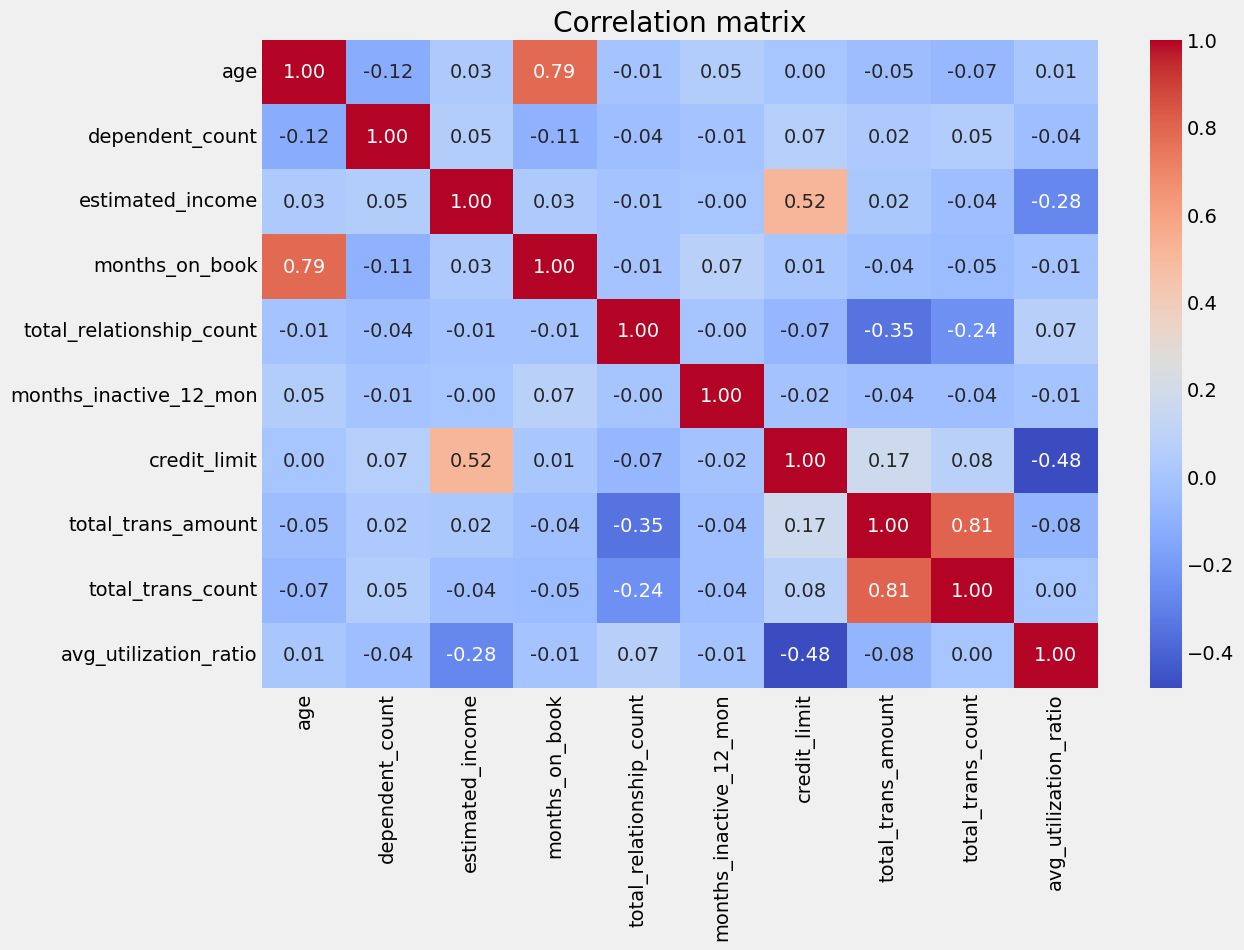

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Correlation matrix")
plt.show()

In [ ]:
import numpy as np
from sklearn.calibration import LabelEncoder

le = LabelEncoder()

for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

df.head(10)

,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
3781,48,0,3,5,2,34000,39,4,3,2991.0,3734,64,0.504
2922,59,1,1,5,2,32000,53,5,5,2192.0,4010,79,0.716
5070,37,0,2,2,0,25000,36,4,3,1734.0,4727,67,0.569
7246,47,1,3,1,0,55000,36,4,2,4786.0,4973,74,0.317
623,42,1,3,5,2,91000,33,3,3,3714.0,1454,35,0.584
3931,65,1,1,2,2,26000,56,5,3,7636.0,3880,67,0.000
4767,52,0,3,2,2,30000,36,3,1,10273.0,3778,70,0.161
7094,58,0,2,3,0,33000,36,5,4,34516.0,3595,52,0.054
3282,35,1,1,1,2,44000,24,6,3,10467.0,2665,65,0.187
3994,48,1,4,0,1,96000,32,5,2,25190.0,1533,41,0.000


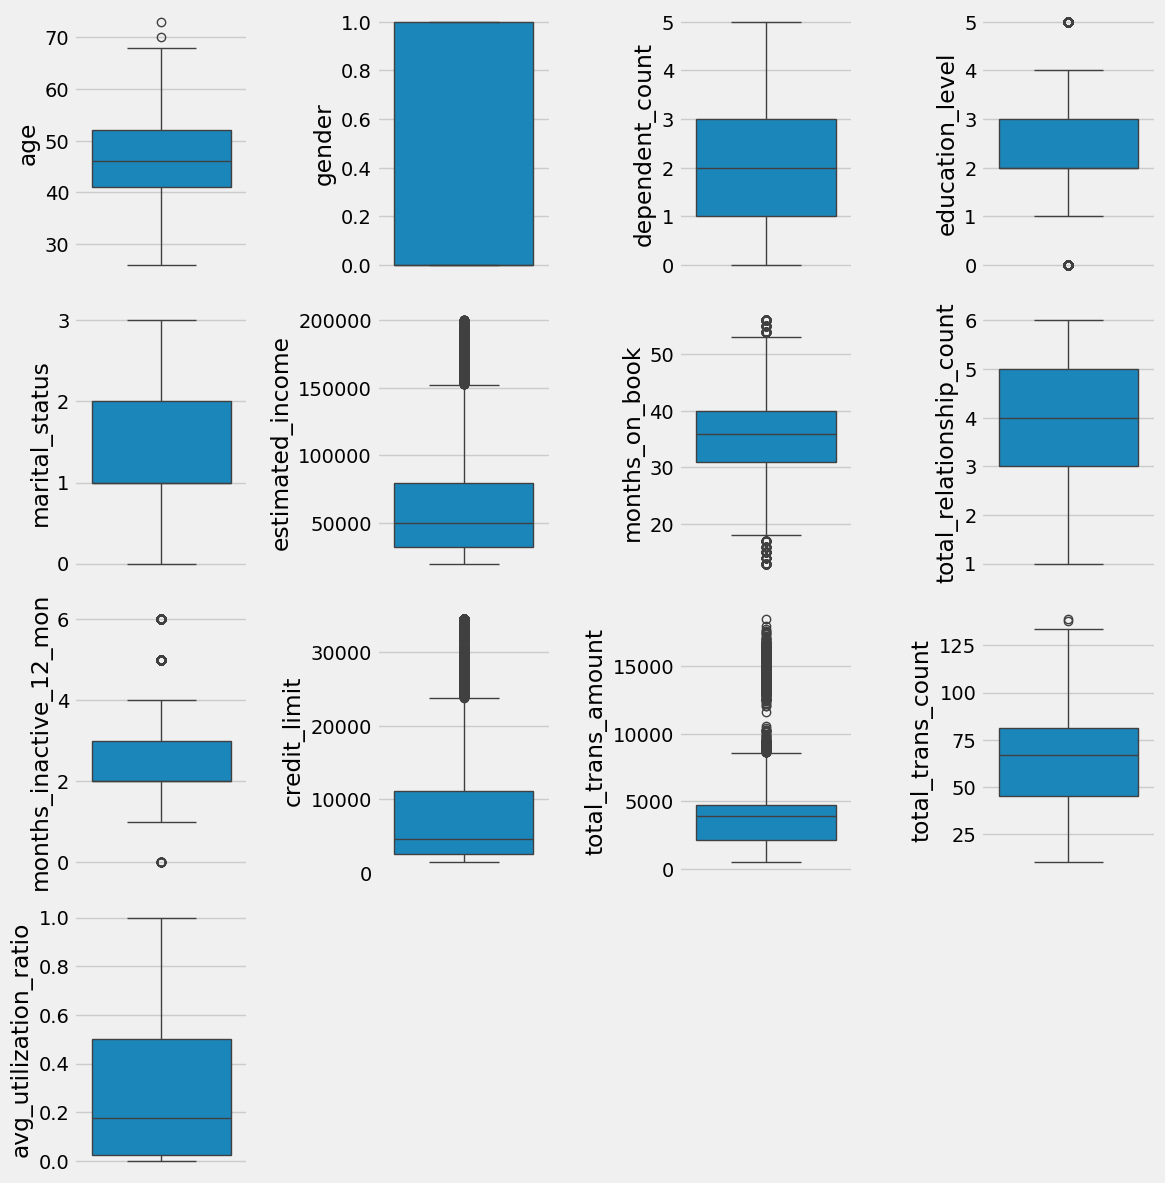

In [52]:
fig = plt.figure(figsize=(12,24))
for i in range(len(df.columns)):
    fig.add_subplot(8,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

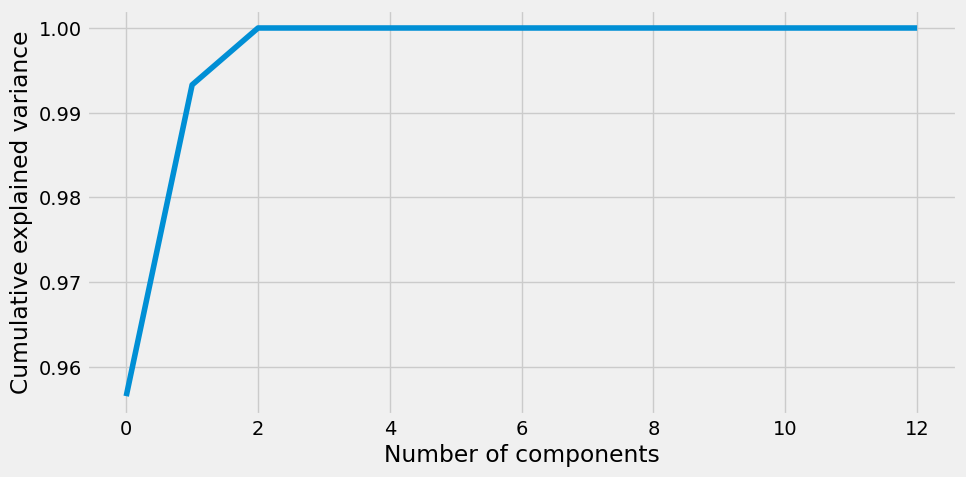

In [53]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df)
data_pca = pca.transform(df)
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [54]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)

## Klasterizacija

### K-Means

In [55]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df.describe()

,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,4.163780e-16,-5.684342e-17,8.384404e-17,1.463718e-16,-1.421085e-18,6.394885e-17,4.030554e-16,1.627143e-16,-1.158185e-16,-3.268497e-17,1.008971e-16,2.984279e-16,-5.044853e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-2.535698e+00,-9.443461e-01,-1.805165e+00,-1.738780e+00,-1.985207e+00,-1.069570e+00,-2.872147e+00,-1.811292e+00,-2.316262e+00,-7.915847e-01,-1.145108e+00,-2.333970e+00,-9.964463e-01
25%,-6.642973e-01,-9.443461e-01,-1.035733e+00,-3.954185e-01,-6.287281e-01,-7.647423e-01,-6.173409e-01,-5.241775e-01,-3.380725e-01,-6.688578e-01,-6.621166e-01,-8.443395e-01,-9.166257e-01
50%,-4.049711e-02,-9.443461e-01,-2.663005e-01,-3.954185e-01,-6.287281e-01,-3.075003e-01,8.994172e-03,1.193799e-01,-3.380725e-01,-4.491101e-01,-1.479641e-01,9.199957e-02,-3.615101e-01
75%,7.080631e-01,1.058934e+00,5.031318e-01,2.762623e-01,7.277510e-01,4.545697e-01,5.100623e-01,7.629373e-01,6.510221e-01,2.666499e-01,9.874969e-02,6.878517e-01,8.249134e-01
max,3.328024e+00,1.058934e+00,2.041996e+00,1.619624e+00,2.084230e+00,3.502850e+00,2.514335e+00,1.406495e+00,3.618306e+00,2.843699e+00,4.138697e+00,3.156382e+00,2.628132e+00


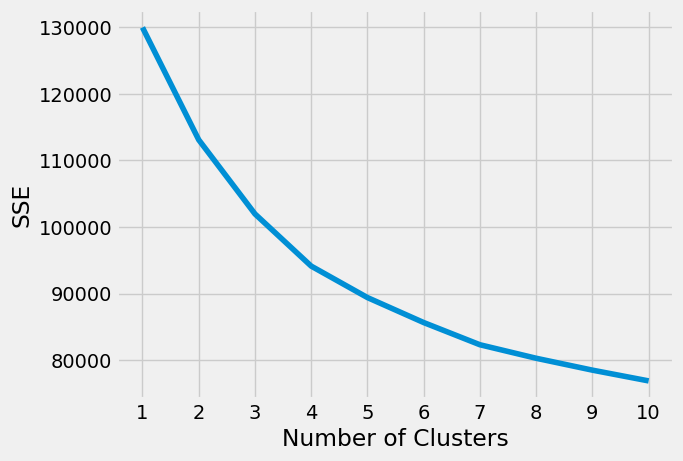

In [56]:
from sklearn.cluster import KMeans

kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
 }

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [57]:
from kneed import KneeLocator

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

np.int64(4)

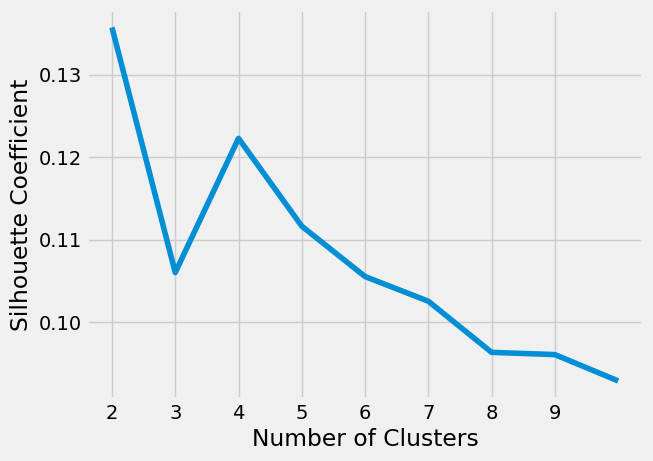

In [58]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k,  random_state=42)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

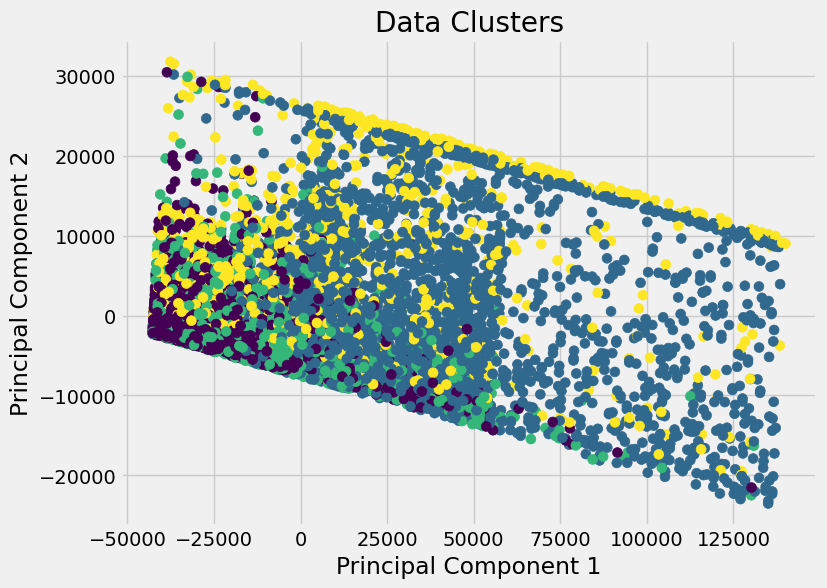

In [59]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_clusters = kmeans.fit_predict(df)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_clusters, s=50, cmap='viridis')
plt.title('Data Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Agglomerative Clustering

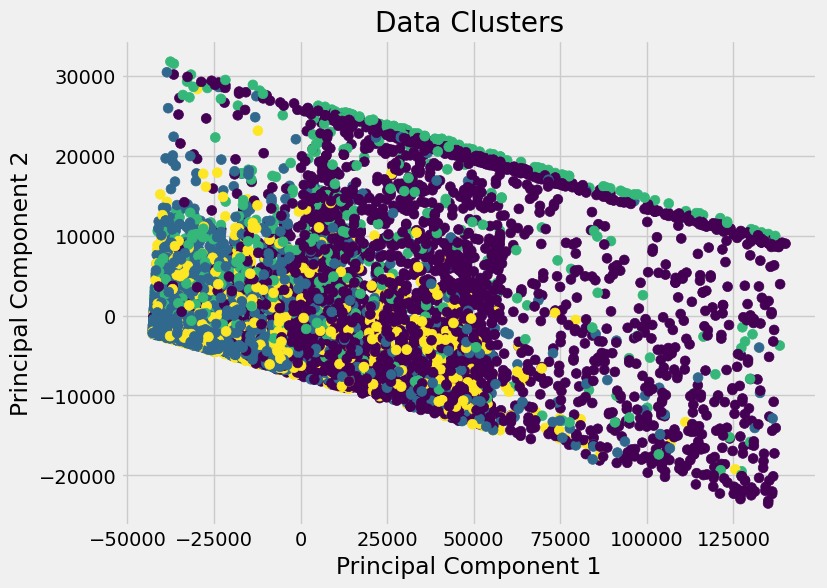

In [60]:
# Agglomerative Hierarchical Clustering

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=4)
agglomerative_clusters = agglomerative.fit_predict(df)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agglomerative_clusters, s=50, cmap='viridis')
plt.title('Data Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

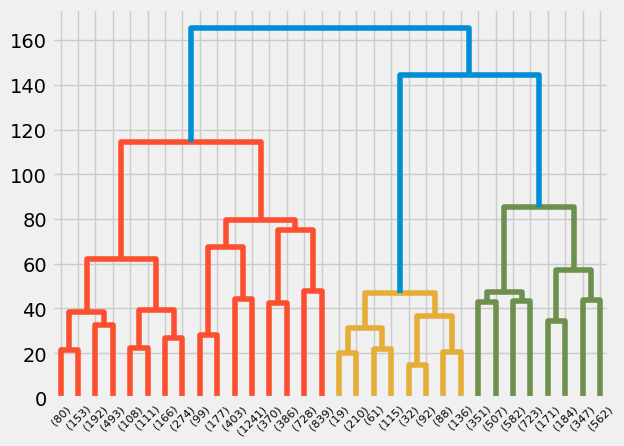

In [61]:
import scipy.cluster.hierarchy as sch

X = df.values
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'), truncate_mode='level', p=4)

## DBSCAN

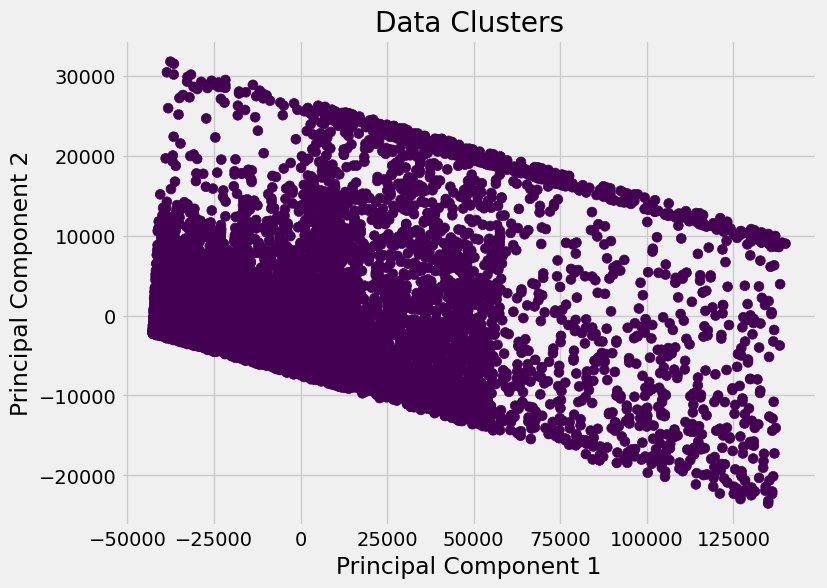

In [62]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
y_dbscan = dbscan.fit_predict(df)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_dbscan, s=50, cmap='viridis')
plt.title('Data Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()